## Analysis
* Out of 618 cities sampled, 551 were found in the weather API.
* Plotting Latitude vs Longitude shows that the sample of cities is spread over the globe (where there is land, see the world map shape of the scatter plot), which indicates we are covering all regions and the analysis is valid.
* Given the analysis was performed during summer in north hemisphere, we can see higher temperature concentration between latitudes 0 and 40. If analysis was performed during winter, we would expect highest temperatures for negative latitudes.
* Latitudes close to zero seems to have the highest humidity levels and the range increases as we move to higher latitudes.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from matplotlib import style
style.use('ggplot')

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

78

## Perform API Calls

In [9]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
unit = "imperial"

# Starting URL for Weather Map API Call
url = f"http://api.openweathermap.org/data/2.5/weather?units={unit}&appid={api_key}&q="

# Create empty lists to collect weather information
cities_found = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []
counter = 0

print("----------------------------")
print("Beginning Data Retrieval")
print("----------------------------")

# Loop through each city
for city in cities:
    
    # Add to the counter and print the city number and name
    counter += 1
    print("Processing city " + str(counter) + ": " + city)
    
    # API call to get information for curret city in the loop
    response = requests.get(url + city).json()
    
    # Check if information was found in the API call
    try:
        # If yes, then append information to each list created above and print the URL
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_found.append(city)
        print(url + city)
    except KeyError:
        # If not, then print that city was not found and the process is skipping it
        print("City " + city + " not found. Skipping...")
        
print("----------------------------")
print("Data Retrieval Completed")
print("----------------------------")

----------------------------
Beginning Data Retrieval
----------------------------
Processing city 1: lasa
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=lasa
Processing city 2: belmonte
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=belmonte
Processing city 3: carnarvon
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=carnarvon
Processing city 4: topolobampo
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=topolobampo
Processing city 5: tabiauea
City tabiauea not found. Skipping...
Processing city 6: albany
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=albany
Processing city 7: punta arenas
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=punta arenas
Processi

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=thompson
Processing city 66: saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=saint-philippe
Processing city 67: katsuura
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=katsuura
Processing city 68: maragogi
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=maragogi
Processing city 69: mar del plata
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=mar del plata
Processing city 70: boralday
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=boralday
Processing city 71: dalvik
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=7d98a394f0c0c1acee6afbb581e1e5b0&q=dalvik
Processing city 72: niko

In [10]:
# Create Data Frame with the lists created in previous step
weather_df = pd.DataFrame({
    "City": cities_found,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

# Check number of rows for each information collected in previous step, for cities that were found
weather_df.count()

City          65
Cloudiness    65
Country       65
Date          65
Humidity      65
Lat           65
Lng           65
Max Temp      65
Wind Speed    65
dtype: int64

In [11]:
# Export file as a CSV, without the Pandas index and but with the header
weather_df.to_csv(output_data_file, index=False, header=True)

In [12]:
# Display first 5 rows of the dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lasa,20,CY,1538082000,83,34.92,32.53,71.60,6.93
1,belmonte,20,PT,1538083334,76,40.36,-7.35,65.47,3.15
2,carnarvon,0,ZA,1538083334,35,-30.97,22.13,45.58,4.61
3,topolobampo,20,MX,1538080980,49,25.60,-109.05,91.40,9.17
4,albany,75,US,1538081640,58,42.65,-73.75,66.92,3.36


## Latitude vs Longitude

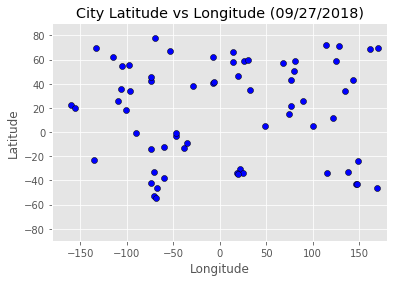

In [13]:
# Get the date stamp
today = datetime.now()
today = today.strftime("%m/%d/%Y")

# Scatter Plot with color and edgecolor options
plt.scatter(weather_df["Lng"],weather_df["Lat"],color="blue",edgecolors="black")

# Assing the title, axis labels and limits, and grid
plt.title(f"City Latitude vs Longitude ({today})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(-180,180)
plt.ylim(-90,90)

# Save scatter plot to a png image and show
plt.savefig("Output/longitude_latitude.png")
plt.show()

## Latitude vs Temperature Plot

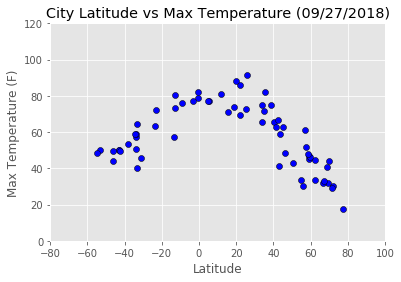

In [14]:
# Scatter Plot with color and edgecolor options
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],color="blue",edgecolors="black")

# Assing the title, axis labels and limits, and grid
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-80,100)
plt.ylim(0,120)

# Save scatter plot to a png image and show
plt.savefig("Output/temperature_latitude.png")
plt.show()

## Latitude vs Humidity Plot

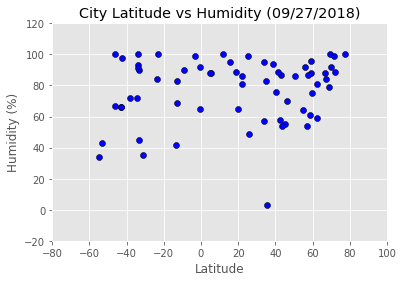

In [15]:
# Scatter Plot with color and edgecolor options
plt.scatter(weather_df["Lat"],weather_df["Humidity"],color="blue",edgecolors="black")

# Assing the title, axis labels and limits, and grid
plt.title(f"City Latitude vs Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80,100)
plt.ylim(-20,120)

# Save scatter plot to a png image and show
plt.savefig("Output/humidity_latitude.png")
plt.show()

## Latitude vs Cloudiness Plot

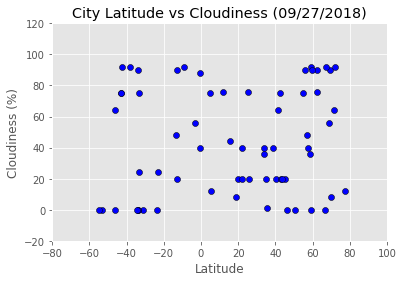

In [16]:
# Scatter Plot with color and edgecolor options
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],color="blue",edgecolors="black")

# Assing the title, axis labels and limits, and grid
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80,100)
plt.ylim(-20,120)

# Save scatter plot to a png image and show
plt.savefig("Output/cloudiness_latitude.png")
plt.show()

## Latitude vs Wind Speed Plot

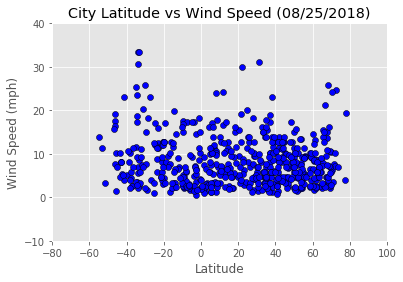

In [11]:
# Scatter Plot with color and edgecolor options
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],color="blue",edgecolors="black")

# Assing the title, axis labels and limits, and grid
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,100)
plt.ylim(-10,40)

# Save scatter plot to a png image and show
plt.savefig("Output/wind_latitude.png")
plt.show()